# Linear Regression Notebook

Ta sẽ giải bài toán hồi quy tuyến tính theo 2 cách:
- Gradient descent: chúng ta sẽ dần dần tối ưu các hệ số của model bằng gradient của nó cho đến khi đạt được điểm tối ưu  
- Normal equation: sử dụng công thức nghiệm trong đại số tuyến tính để tính ra hệ số của mô hình  
## Chú ý: ##
- $X \in R^{N,D}$ : bộ dữ liệu có N điểm dữ liệu với D là số chiều của mỗi điểm dữ liệu
- $y \in R^{N}$ : các nhãn của dữ liệu
- $w \in R^{D}$ : hệ số của mô hình
- $\hat{y} = Xw$ : nhãn dự đoán của mô hình 

In [1]:
# import thư viện
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Tạo dữ liệu mẫu 
# Đầu vào gồm có: noise, degree
# Đàu ra gồm có: X, X_transforms, y
class Dataset:
    def __init__(self, noise=10, degree = 1):
        self.noise = noise
        self.degree = degree

    def _transform(self, X):
        # Chuyển đổi ma trận đàu vào thành ma trận đa thức
        X_temp = X[:]
        for d in range(2, self.degree + 1):
            X_temp = np.concatenate(( (X[:,0].reshape(-1,1)**d), X_temp), axis=1)

        return X_temp
    
    def _prepare_data(self, num_points = 100):
        X = np.linspace(-2, 2, num_points).reshape(-1, 1)
        coef = []
        for d in range(self.degree):
            coef.append(np.random.uniform(-20, 40))
        coef.append(np.random.uniform(0, 2))
        coef = np.array(coef)  
        X_transforms = self._transform(X)
        bias = np.ones((num_points, 1))
        X_transforms = np.concatenate((X_transforms, bias), axis=1)
        y = X_transforms.dot(coef).reshape(-1,1) + np.random.uniform(1, self.noise, num_points).reshape(-1, 1)

        return X, X_transforms, y
     

In [3]:
dataset = Dataset()
X, X_transforms, y = dataset._prepare_data()

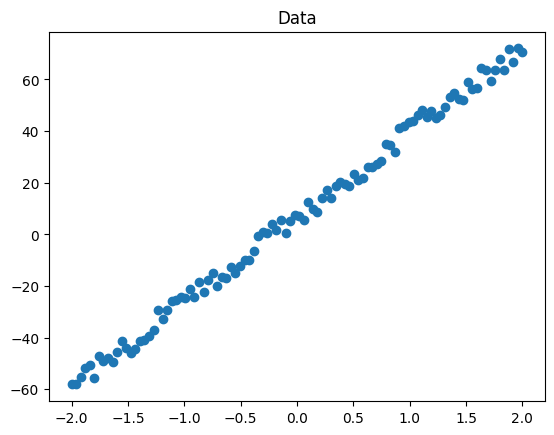

In [4]:
# Visualize
fig = plt.figure(1)
ax = fig.add_subplot()
ax.set_title("Data")
ax.scatter(X, y)

In [5]:
def do_plot(X, y, y_hat, title, figure_num = 1):
    fig = plt.figure(figure_num)
    ax = fig.add_subplot()
    ax.set_title(title)
    ax.scatter(X, y)
    ax.plot(X, y_hat, color='red', label='Prediction')
    plt.legend()
    plt.show()

1. Gradient descent: 

Hàm mục tiêu (hàm loss):
$$L(w) = \frac{1}{2N} \sum_{i=1}^{N}(x_i w-y_i)^2 $$
Đạo hàm của L theo w:
$$ \frac{\partial L}{\partial w} = \frac{1}{N}X^T(Xw - y) $$
Gradient descent:
$$ w = w - \alpha \frac{\partial L}{\partial w} $$



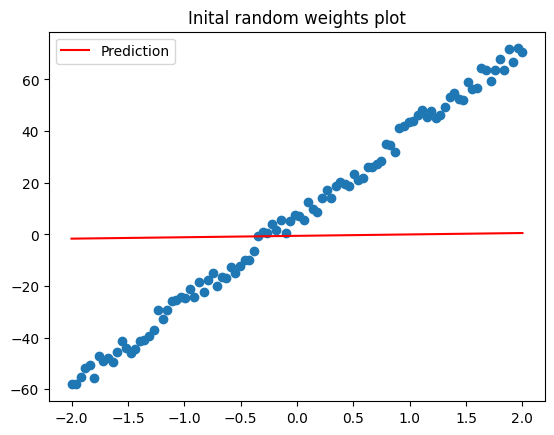

In [6]:
theta = np.random.normal(size = (X_transforms.shape[1], 1))
y_hat = X_transforms.dot(theta)
do_plot(X, y, y_hat, "Inital random weights plot", 2)

In [7]:
def gradient(X, y, theta):
    # Tính toán gradient
    m = X.shape[0]
    return (1/m) * X.T.dot(X.dot(theta) - y)

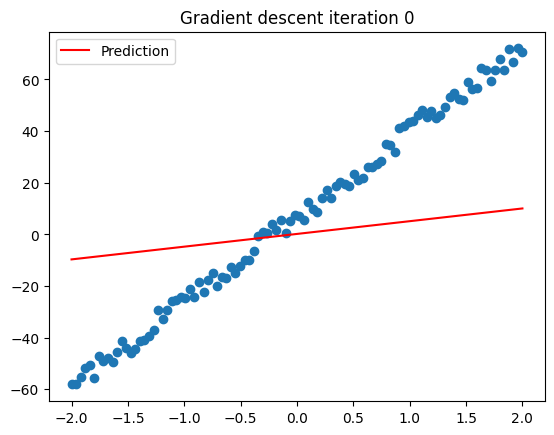

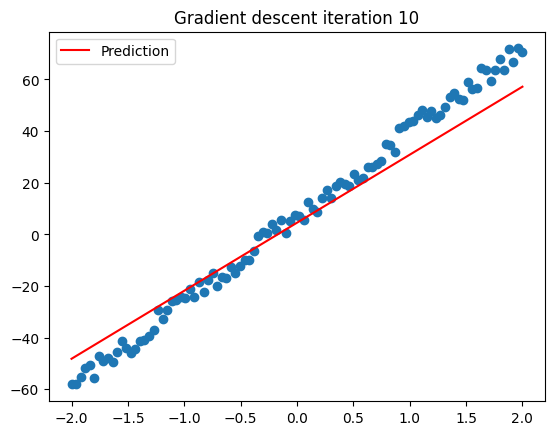

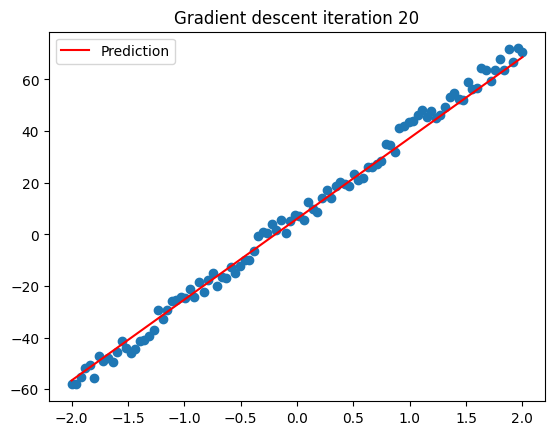

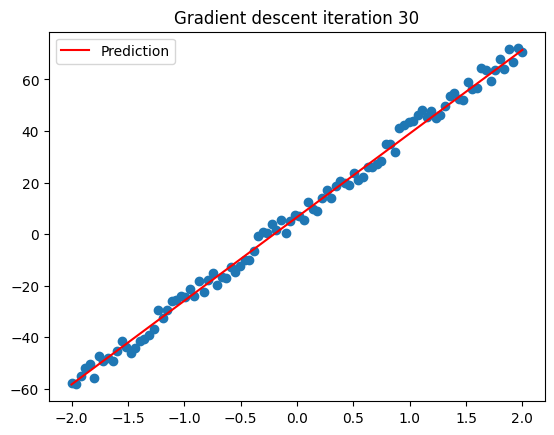

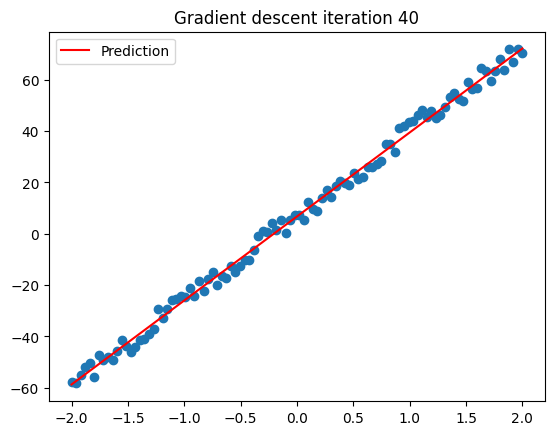

In [8]:
for i in range(50):
    grad = gradient(X_transforms, y, theta)
    theta = theta - 0.1 * grad
    y_hat = X_transforms.dot(theta)
    if i % 10 == 0:
        do_plot(X, y, y_hat, "Gradient descent iteration {}".format(i), i // 10)

2. Normal equation  

$$ Xw = y $$
$$ \Longrightarrow w = (X^TX)^{-1}X^Ty $$

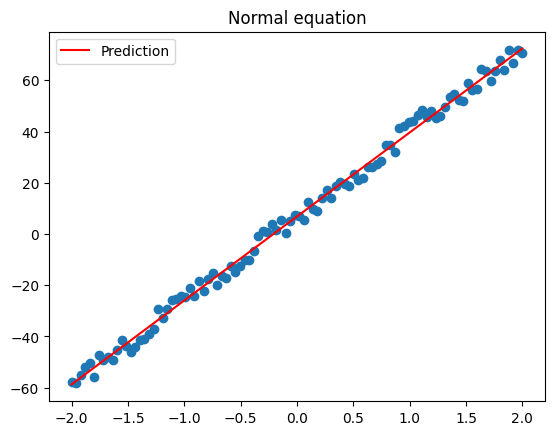

In [9]:
w = np.linalg.inv(X_transforms.T.dot(X_transforms)).dot(X_transforms.T).dot(y)
y_hat = X_transforms.dot(w)
do_plot(X, y, y_hat, "Normal equation", 3)

Trong thực tế, người ta ít sử dụng phương pháp normal equation bởi vì độ phức tạp của việc tính toán cao, cộng với việc phải lưu trữ ma trận cỡ lớn trong bộ nhớ

3. Polynomial linear regression  

In [10]:
data = Dataset(noise=10, degree=2)

X, X_transforms, y = data._prepare_data()

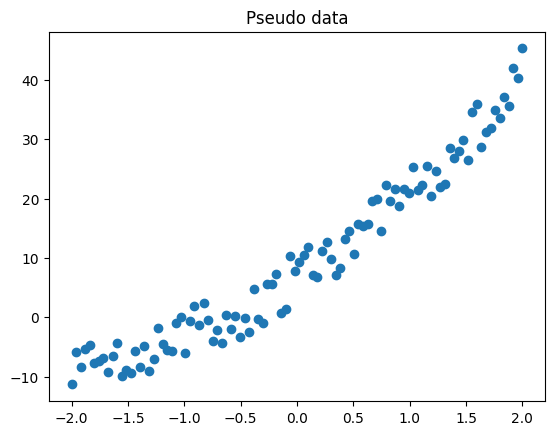

In [11]:
fig = plt.figure(4)
ax = fig.add_subplot()
ax.set_title("Pseudo data")
ax.scatter(X, y)

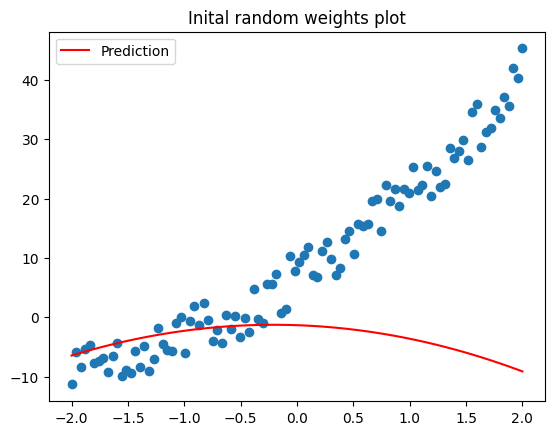

In [12]:
theta = np.random.normal(size = (X_transforms.shape[1], 1))
y_hat = X_transforms.dot(theta)
do_plot(X, y, y_hat, "Inital random weights plot", 5)

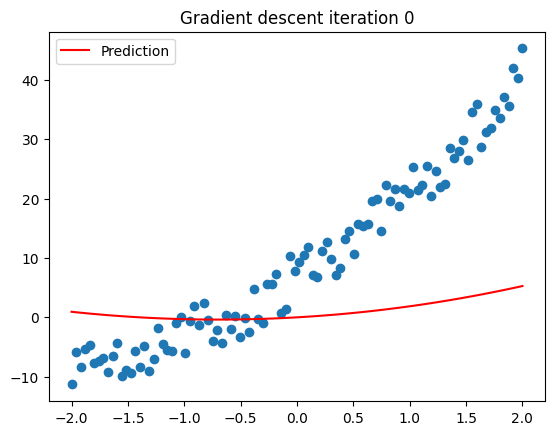

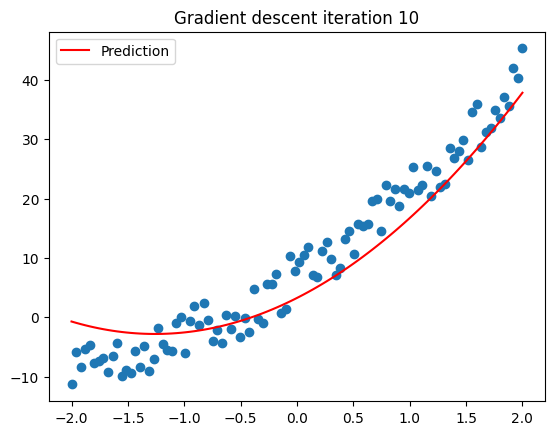

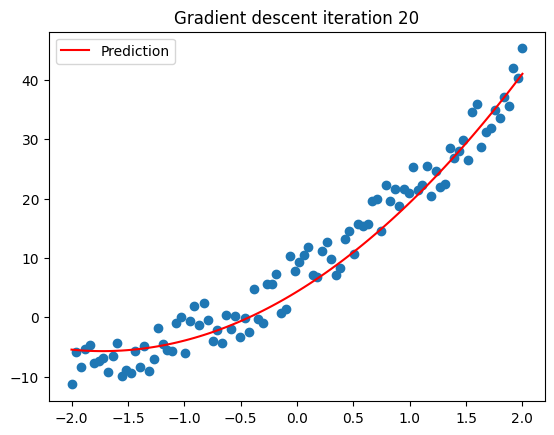

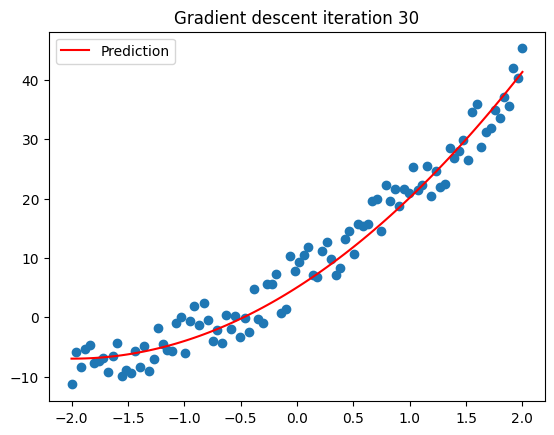

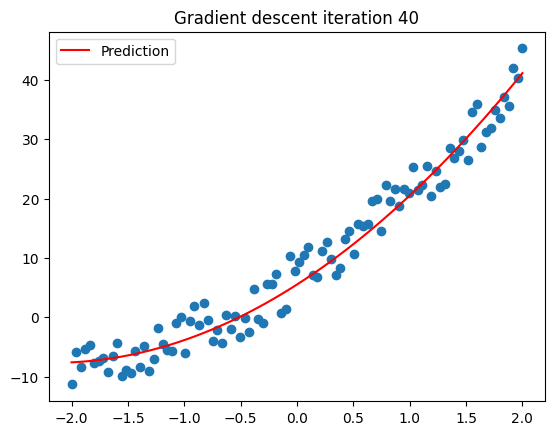

In [13]:
for i in range(50):
    theta -= 0.1 * gradient(X_transforms, y, theta)
    if i % 10 == 0:
        y_hat = X_transforms.dot(theta)
        do_plot(X, y, y_hat, "Gradient descent iteration {}".format(i), i // 10 )
        

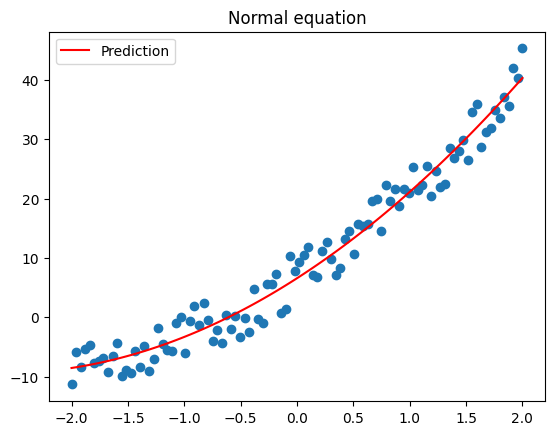

In [14]:
w = np.linalg.inv(X_transforms.T.dot(X_transforms)).dot(X_transforms.T).dot(y)

y_hat =X_transforms.dot(w)
do_plot(X, y, y_hat, "Normal equation", 6)